In [1]:
from google.colab import files
uploaded = files.upload()

Saving ds3021_lab3data.csv to ds3021_lab3data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ds3021_lab3data.csv')
df.head() # look at the first couple rows of the data

,year,id_,marital,educ,race,income,rincome,partyid,relig
0,1972,1,Never married,4 years of college,White,.i: Inapplicable,.i: Inapplicable,"Independent, close to democrat",Jewish
1,1972,2,Married,10th grade,White,.i: Inapplicable,.i: Inapplicable,Not very strong democrat,Catholic
2,1972,3,Married,12th grade,White,.i: Inapplicable,.i: Inapplicable,"Independent (neither, no response)",Protestant
3,1972,4,Married,5 years of college,White,.i: Inapplicable,.i: Inapplicable,Not very strong democrat,Other
4,1972,5,Married,12th grade,White,.i: Inapplicable,.i: Inapplicable,Strong democrat,Protestant


In [7]:
# i want to delete the year and id columns, so:
df = df.drop(df.columns[:2], axis=1)

In [8]:
df.head()

,marital,educ,race,income,rincome,partyid,relig
0,Never married,4 years of college,White,.i: Inapplicable,.i: Inapplicable,"Independent, close to democrat",Jewish
1,Married,10th grade,White,.i: Inapplicable,.i: Inapplicable,Not very strong democrat,Catholic
2,Married,12th grade,White,.i: Inapplicable,.i: Inapplicable,"Independent (neither, no response)",Protestant
3,Married,5 years of college,White,.i: Inapplicable,.i: Inapplicable,Not very strong democrat,Other
4,Married,12th grade,White,.i: Inapplicable,.i: Inapplicable,Strong democrat,Protestant


In [54]:
df.describe()

,marital,educ,race,income,rincome,partyid,relig
count,72390,72390,72390,72390,72390,72390,62495
unique,8,22,4,17,17,10,15
top,Married,12th grade,White,"$25,000 or more",.i: Inapplicable,Not very strong democrat,Protestant
freq,37596,21401,57657,34785,25799,14286,40124


In [9]:
df.shape

(72390, 7)

The above shows us that we have 7 columns (variables) and 72390 rows (entries). Now to clean the data, I will first parse through the unique entry answers for each column to remove missing/not applicable values. I first want to examine education level.

In [55]:
educ_answers = df['educ'].unique()
print(educ_answers)

['4 years of college' '10th grade' '12th grade' '5 years of college'
 '2 years of college' '1 year of college' '6th grade' '9th grade'
 '8th grade' '11th grade' '7th grade' '3 years of college'
 '8 or more years of college' '6 years of college' '3rd grade' '2nd grade'
 '4th grade' '5th grade' '7 years of college' '1st grade' 'Unknown'
 'No formal schooling']


<ipython-input-68-dc4248333c07>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_by_educ['educ'] = pd.Categorical(df_cleaned_by_educ['educ'],


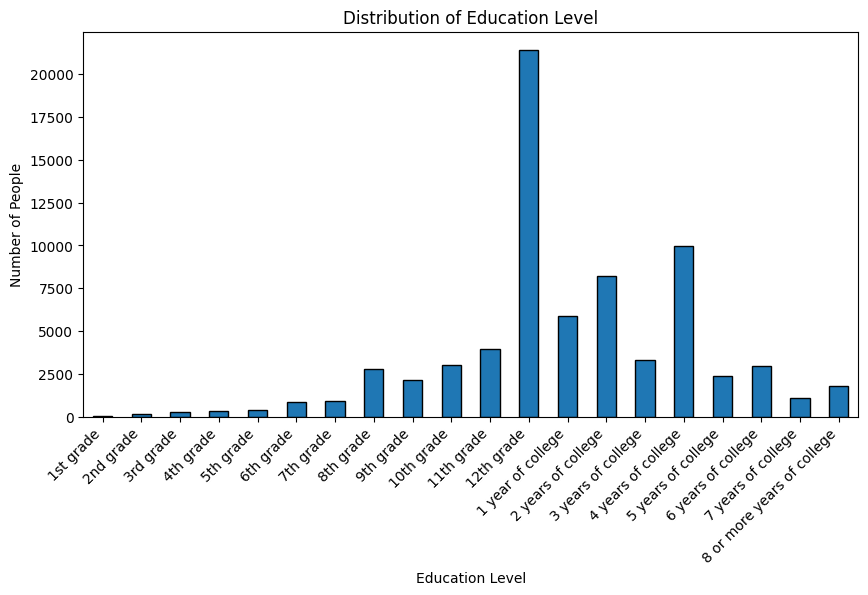

In [68]:
# replacing the non-applicable entries in the educ column with NaN:
df['educ'] = df['educ'].replace('.n:  No answer', np.nan)
df['educ'] = df['educ'].replace('.d:  Do not Know/Cannot Choose', np.nan)

# replacing NaN values with 'Unknown' to remove them from the data frame:
df['educ'] = df['educ'].fillna('Unknown')
df_cleaned_by_educ = df[df['educ'] != 'Unknown']

education_order = [
    '1st grade', '2nd grade', '3rd grade', '4th grade', '5th grade', '6th grade',
    '7th grade', '8th grade', '9th grade', '10th grade', '11th grade', '12th grade',
    '1 year of college', '2 years of college', '3 years of college',
    '4 years of college', '5 years of college', '6 years of college',
    '7 years of college', '8 or more years of college'
]

# converting 'educ' to a categorical column with the correct order:
df_cleaned_by_educ['educ'] = pd.Categorical(df_cleaned_by_educ['educ'],
                                            categories=education_order,
                                            ordered=True)
# plot categorical histogram for education level:
plt.figure(figsize=(10, 5))
df_cleaned_by_educ['educ'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xticks(rotation=45, ha='right') # makes sure we can see each label
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.show()

Then, I want to examine the individual income data. So, we first have to clean the rincome data that corresponds with the already cleaned education level data (so we can cross-examine later).

In [57]:
# same as above, parse through unique entries to remove na values
rincome_answers = df_cleaned_by_educ['rincome'].unique()
print(rincome_answers)

['.i:  Inapplicable' '$1000 TO 2999' '$15000 - 19999' '$7000 TO 7999'
 '$8000 TO 9999' '$20000 - 24999' '$4000 TO 4999'
 '.d:  Do not Know/Cannot Choose' '$10000 - 14999' '$25000 OR MORE'
 '$3000 TO 3999' 'LT $1000' '$5000 TO 5999' '$6000 TO 6999' '.r:  Refused'
 '.n:  No answer' '.s:  Skipped on Web']


In [58]:
# rmaking sure all of the entries are strings:
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].astype(str)

# replacing all the na values with NaN to be removed later:
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('.i:  Inapplicable', np.nan)
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('.d:  Do not Know/Cannot Choose', np.nan)
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('.r:  Refused', np.nan)
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('.n:  No answer', np.nan)
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('.s:  Skipped on Web', np.nan)

# replacing all the remaining unique answer labels to be structured the same way:
# (there probably is an easier/faster way to do this but it was taking more time
# for me to figure out how to do that than just copying and pasting)

df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('LT $1000', '<1000')
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('$1000 TO 2999', '1000-2999')
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('$3000 TO 3999', '3000-3999')
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('$4000 TO 4999', '4000-4999')
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('$5000 TO 5999', '5000-5999')
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('$6000 TO 6999', '6000-6999')
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('$7000 TO 7999', '7000-7999')
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('$8000 TO 9999', '8000-9999')
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('$10000 - 14999', '10000-14999')
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('$15000 - 19999', '15000-19999')
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('$20000 - 24999', '20000-24999')
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('$25000 OR MORE', '>25000')

# removing NaN values:
df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].fillna('Unknown')
df_cleaned_by_educ_and_rincome = df_cleaned_by_educ[df_cleaned_by_educ['rincome'] != 'Unknown']

# making sure the rincome categories stay as categories (instead of becoming continuous numeric data):
df_cleaned_by_educ_and_rincome['rincome'] = df_cleaned_by_educ_and_rincome['rincome'].astype('category')

<ipython-input-58-df641785f655>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].astype(str)
<ipython-input-58-df641785f655>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_by_educ['rincome'] = df_cleaned_by_educ['rincome'].replace('.i:  Inapplicable', np.nan)
<ipython-input-58-df641785f655>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

<ipython-input-59-336be88fa326>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_by_educ_and_rincome['rincome'] = pd.Categorical(df_cleaned_by_educ_and_rincome['rincome'],


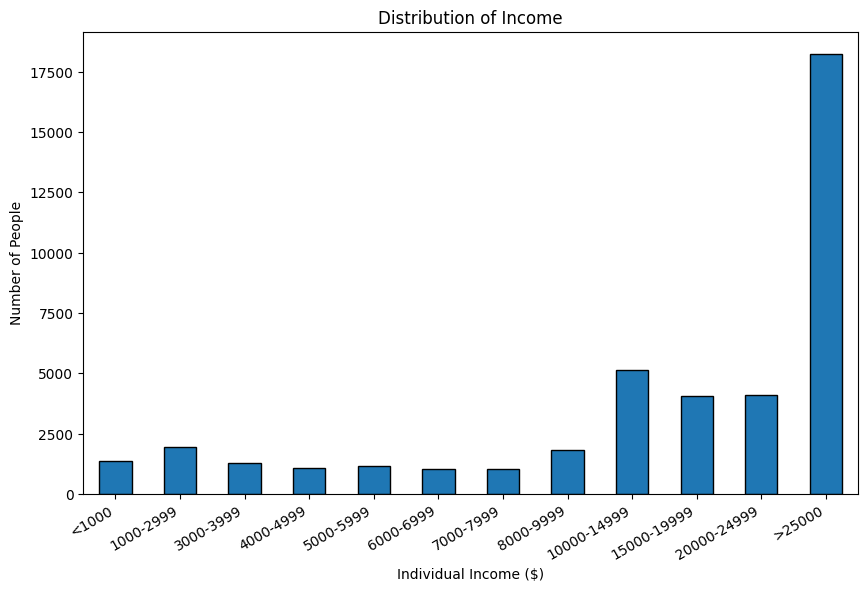

In [59]:
# converting 'rincome' to a categorical column with the correct order:

rincome_order = [
    '<1000', '1000-2999', '3000-3999', '4000-4999', '5000-5999', '6000-6999',
    '7000-7999', '8000-9999', '10000-14999', '15000-19999', '20000-24999', '>25000'
]

df_cleaned_by_educ_and_rincome['rincome'] = pd.Categorical(df_cleaned_by_educ_and_rincome['rincome'],
                                            categories=rincome_order,
                                            ordered=True)
# # plot categorical histogram for rincome, same as above for educ:
plt.figure(figsize=(10, 6))
df_cleaned_by_educ_and_rincome['rincome'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xticks(rotation=30, ha='right')
plt.title('Distribution of Income')
plt.xlabel('Individual Income ($)')
plt.ylabel('Number of People')
plt.show()

Now, I want to cross examine education level with individual income (rincome). I'm going to select the education levels 10th grade and above, since individuals in grades lower than that have little to no income (very little data).

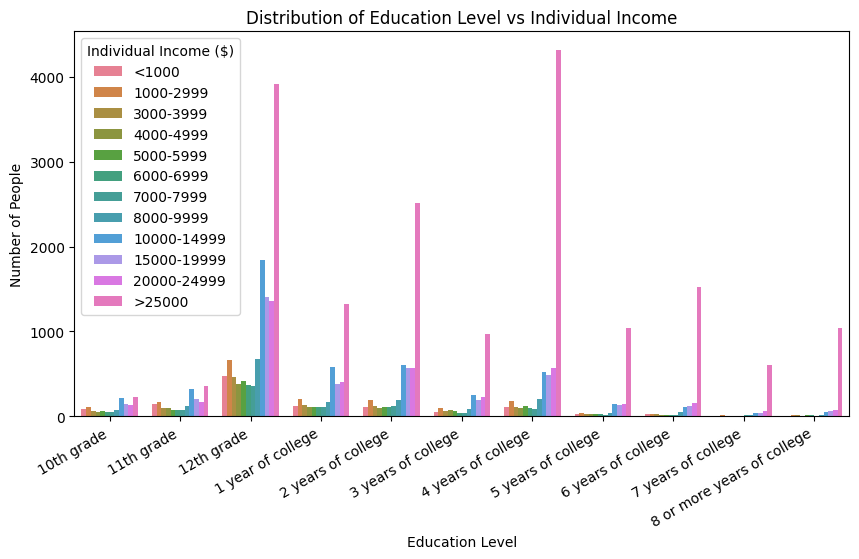

In [69]:
import seaborn as sns

# selecting relevant education levels:
filtered_education_order = ['10th grade', '11th grade', '12th grade',
    '1 year of college', '2 years of college', '3 years of college',
    '4 years of college', '5 years of college', '6 years of college',
    '7 years of college', '8 or more years of college'
]
# creating a new dataframe with just the relevant education levels:
filtered_df = df_cleaned_by_educ_and_rincome[df_cleaned_by_educ_and_rincome['educ'].isin(filtered_education_order)]

# plotting educ vs rincome with seaborn (more displayed features and colors):
plt.figure(figsize=(10, 5))
sns.countplot(x='educ', hue='rincome', data=filtered_df, order=filtered_education_order,)
plt.xticks(rotation=30, ha='right')
plt.title('Distribution of Education Level vs Individual Income')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.legend(title='Individual Income ($)')
plt.show()